In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
m = 10.01      # kg
g = 9.773      # m/s^2
A = 1.642
B = 40.624     # m
D = 2.36


In [3]:
#beta 
def beta(y):
    return A*max(0.0,1-y/B) ** D

In [4]:
#esta funcion calcula tanto velocidad como aceleración en x y y, de tal manera que se puede usar en un integrador
def derivada(t, s):
    x, y, vx, vy = s
    v = np.hypot(vx, vy)
    if v == 0:
        ax = 0
        ay = -g
    else:
        b = beta(y)
        ax = -b*v*vx/m
        ay = -g - b*v*vy/m

    return np.array([vx, vy, ax, ay])

In [5]:
#alcance
def alcance(v0, theta):
    ang = np.deg2rad(theta)
    vx0 = v0 * np.cos(ang) 
    vy0 = v0 * np.sin(ang)
    s0 = np.array([0, 0, vx0, vy0])  # estado inicial: x, y, vx, vy


    def impact(t, s):
        return s[1] #(devuelve la altura y se detiene cuando es 0)

    impact.terminal = True
    impact.direction = -1

    solucion = solve_ivp(derivada, [0, 200], s0,
                    events=impact,
                    max_step=0.05,
                    rtol=1e-6, atol=1e-8)

    if solucion.status == 1 and len(solucion.t_events[0]) > 0:
        return solucion.y_events[0][0][0] #y_events[0] es el array con el primer evento de esta naturaleza en ocurrir, y_events[0][0] el evento puede repetirse segun la función, solo nos interesa el primer rebote, y_events[0][0][0] es la compoenente x de la vez que pasó eso
    else:
        return None

In [6]:
#recreación

v0_vals = np.linspace(1, 140, 140)  # valores de velocidad inicial
angulos = np.linspace(10, 80, 100)

x_max = []
mejor_angulo = []

#Primero se recorren las Velociodades iniciales
for v0 in v0_vals:
    x_bueno = -1.0
    angulo_bueno = None
    #Luego se recorren los angulos
    for theta in angulos:
        x_piso = alcance(v0, theta)
        if x_piso is not None and x_piso > x_bueno:
            x_bueno = x_piso
            angulo_bueno = theta
    x_max.append(x_bueno)
    mejor_angulo.append(angulo_bueno)
        

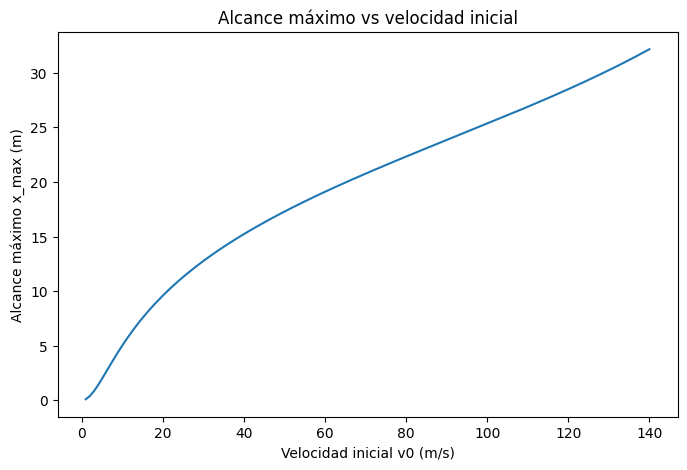

In [7]:
plt.figure(figsize=(8,5))
plt.plot(v0_vals, x_max)
plt.xlabel("Velocidad inicial v0 (m/s)")
plt.ylabel("Alcance máximo x_max (m)")
plt.title("Alcance máximo vs velocidad inicial")
plt.savefig("2.a.pdf")

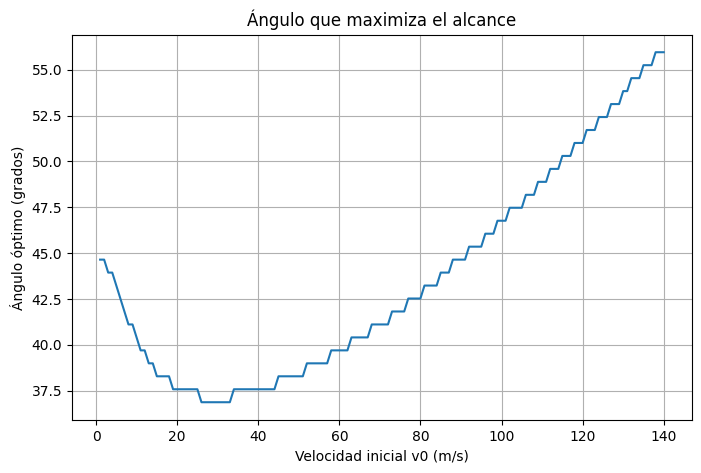

In [8]:
plt.figure(figsize=(8,5))
plt.plot(v0_vals, mejor_angulo)
plt.xlabel("Velocidad inicial v0 (m/s)")
plt.ylabel("Ángulo óptimo (grados)")
plt.title("Ángulo que maximiza el alcance")
plt.grid(True)
plt.show()

In [10]:
def horizontal_at_y(v0, ang_deg, target_y):
    ang = np.deg2rad(ang_deg)
    vx0 = v0 * np.cos(ang)
    vy0 = v0 * np.sin(ang)
    s0 = [0.0, 0.0, vx0, vy0]

    def cross_target(t, s):
        return s[1] - target_y
    cross_target.terminal = True
    cross_target.direction = -1   # cruza bajando

    sol = solve_ivp(deriv, [0, 200], s0,
                    events=cross_target,
                    max_step=0.05,
                    rtol=1e-6, atol=1e-8)
    if sol.status == 1 and len(sol.t_events[0]) > 0:
        return sol.y_events[0][0][0]  # x cuando y=target_y
    else:
        return None